Arguments not provided or invalid. Using default values.


/tmp/ipykernel_3117/669968737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(data=data, x='Sum', y='Frequency', palette='bright')
/tmp/ipykernel_3117/669968737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(data=data, x='Sum', y='Frequency', palette='bright')
/tmp/ipykernel_3117/669968737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(data=data, x='Sum', y='Frequency', palette='bright')
/tmp/ipykernel_3117/669968737.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

Animation saved as die_roll_animation.gif.


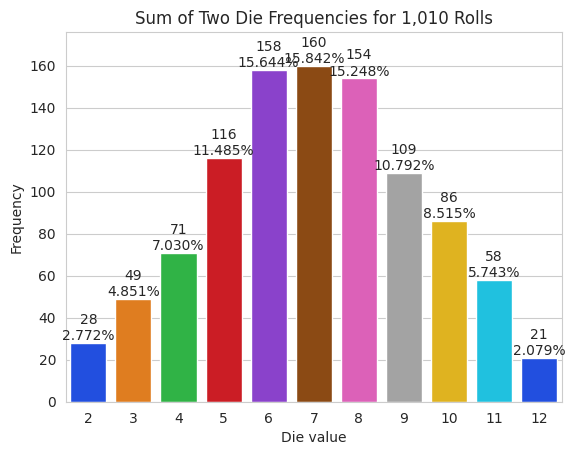

In [22]:
import pandas as pd
from matplotlib import animation
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys

def update(frame_number, rolls, faces, frequencies):
    for _ in range(rolls):
        roll_sum = random.randint(1, 6) + random.randint(1, 6)
        frequencies[roll_sum - 2] += 1

    plt.cla()
    
    data = pd.DataFrame({'Sum': faces, 'Frequency': frequencies})
    axes = sns.barplot(data=data, x='Sum', y='Frequency', palette='bright')
    axes.set_title(f'Sum of Two Die Frequencies for {sum(frequencies):,} Rolls')
    axes.set(xlabel='Die value', ylabel='Frequency')
    axes.set_ylim(top=max(frequencies) * 1.10)

    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{frequency:,}\n{frequency / sum(frequencies):.3%}'
        axes.text(text_x, text_y, text, ha='center', va='bottom')

try:
    number_of_frames = int(sys.argv[1])
    rolls_per_frame = int(sys.argv[2])
except (IndexError, ValueError):
    print("Arguments not provided or invalid. Using default values.")
    number_of_frames = 100
    rolls_per_frame = 10

sns.set_style('whitegrid')
figure = plt.figure('Rolling a Six-Sided Die')
values = list(range(2, 13))
frequencies = [0] * len(values)

die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=number_of_frames, interval=33, fargs=(rolls_per_frame, values, frequencies)
)

output_file = "die_roll_animation.gif"
die_animation.save(output_file, writer='pillow')

print(f"Animation saved as {output_file}.")
plt.show()
